# image classification using CIFAR-10

**Load the dataset from keras datasets module**

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


**Plot some images from the dataset to visualize the dataset**

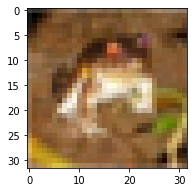

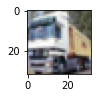

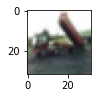

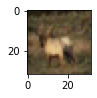

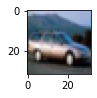

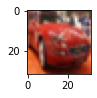

In [2]:
import matplotlib.pyplot as plt
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
  plt.show()

**Import the required layers and modules to create our convolution neural net architecture**

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

**Convert the pixel values of the dataset to float type and then normalize the dataset**

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32') 
train_X=train_X/255.0
test_X=test_X/255.0

**Now perform the one-hot encoding for target classes**

In [5]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

**Create the sequential model and add the layers**



In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

**Configure the optimizer and compile the model**

In [7]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

**View the model summary for better understanding of model architecture**

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

**Train the model**

In [9]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 193s 4ms/step - loss: 1.7139 - accuracy: 0.3822 - val_loss: 1.3873 - val_accuracy: 0.4968
Epoch 2/10
50000/50000 [==============================] - 193s 4ms/step - loss: 1.3248 - accuracy: 0.5265 - val_loss: 1.2043 - val_accuracy: 0.5685
Epoch 3/10
50000/50000 [==============================] - 195s 4ms/step - loss: 1.1582 - accuracy: 0.5859 - val_loss: 1.0866 - val_accuracy: 0.6149
Epoch 4/10
50000/50000 [==============================] - 192s 4ms/step - loss: 1.0392 - accuracy: 0.6296 - val_loss: 1.0185 - val_accuracy: 0.6416
Epoch 5/10
50000/50000 [==============================] - 193s 4ms/step - loss: 0.9424 - accuracy: 0.6679 - val_loss: 0.9652 - val_accuracy: 0.6608
Epoch 6/10
50000/50000 [==============================] - 192s 4ms/step - loss: 0.8568 - accuracy: 0.6957 - val_loss: 0.9315 - val_accuracy: 0.6707
Epoch 7/10
50000/50000 [==============================] - 192s

**Save the model**

In [10]:
model.save("cifar_model_Saved.h5")

**Make a dictionary to map to the output classes and make predictions from the model**

This is a horse


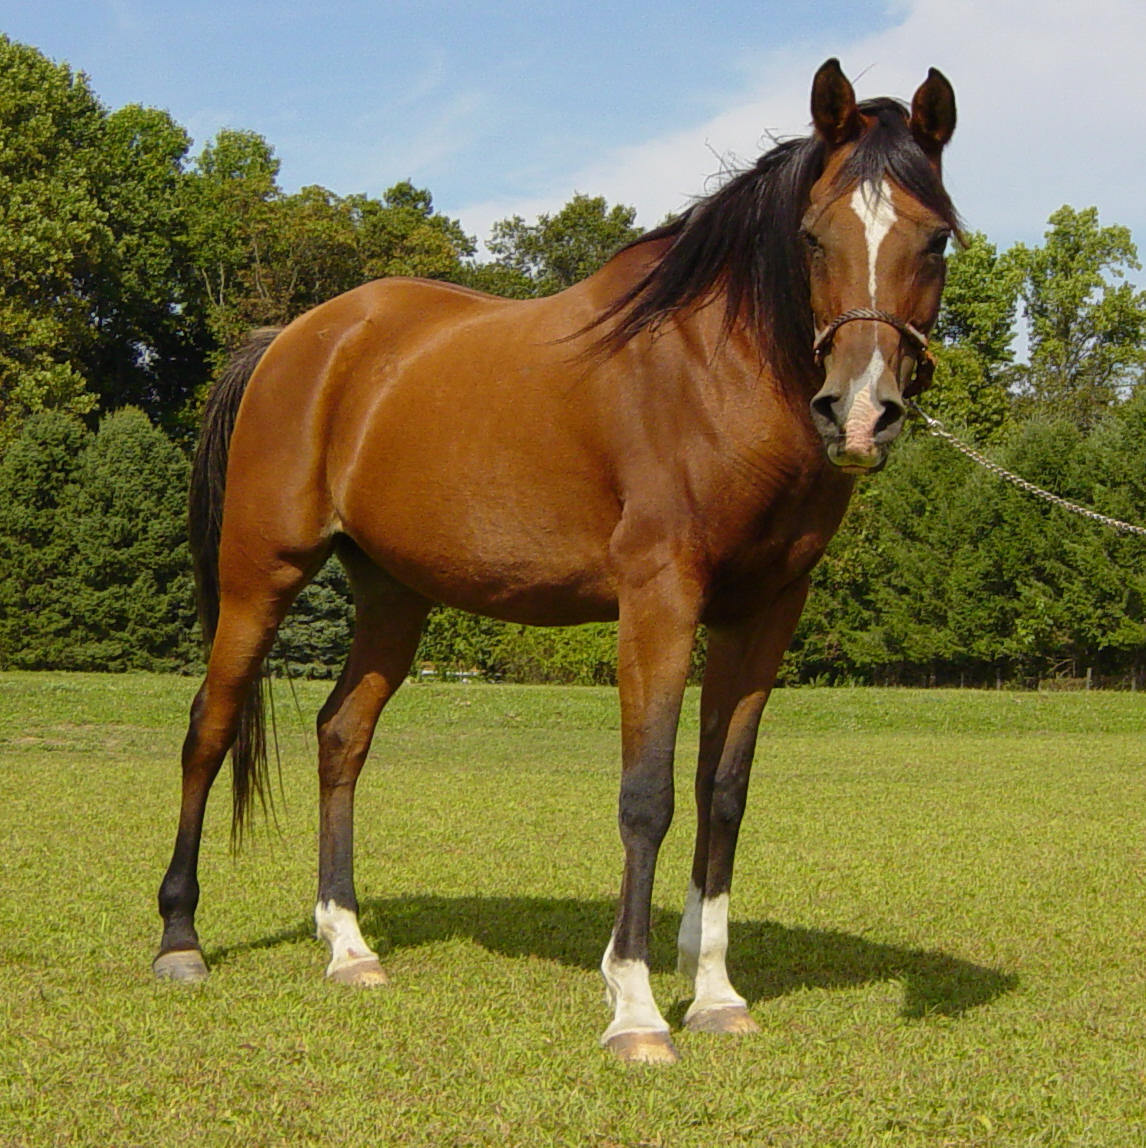

In [36]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("horse.jpg")
im.show()
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(f'This is a {results[pred]}')
from IPython.display import display, Image
display(Image(filename='horse.jpg'))


This is -> aeroplane


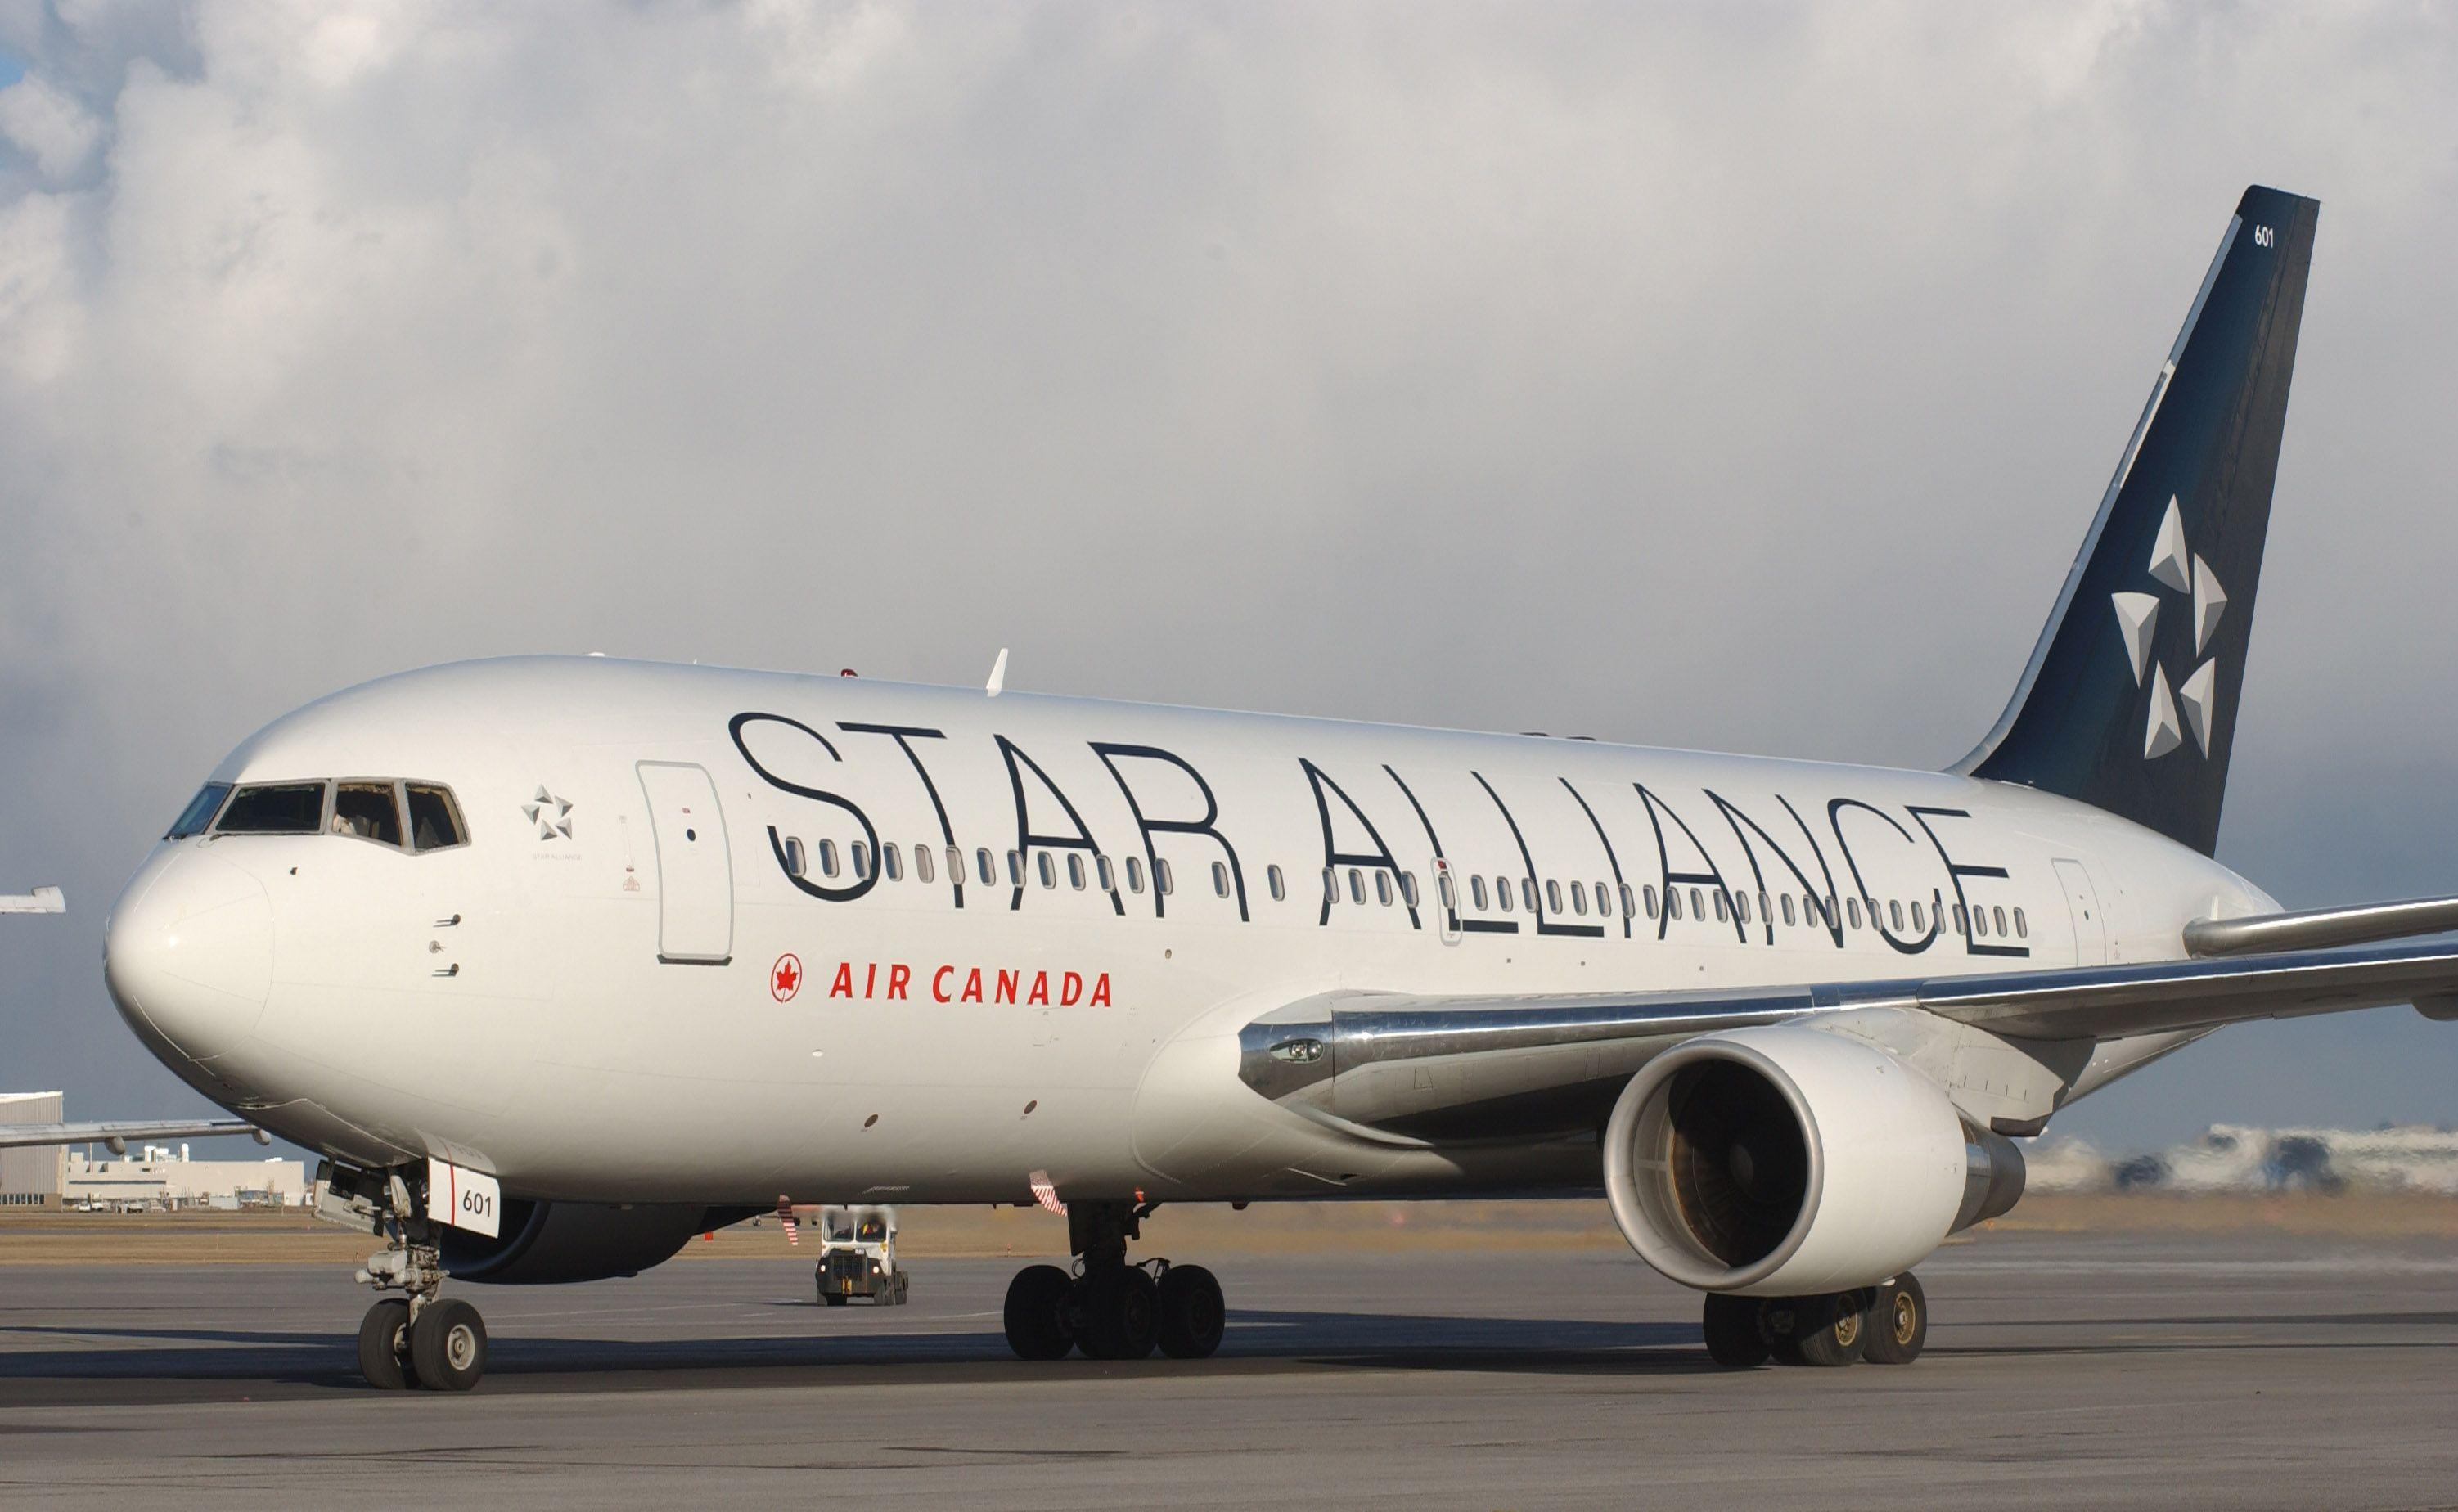

In [40]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("aeroplane.jpg")
im.show()
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(f'This is -> {results[pred]}')
from IPython.display import display, Image
display(Image(filename='aeroplane.jpg'))
